# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [2]:
import lut

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

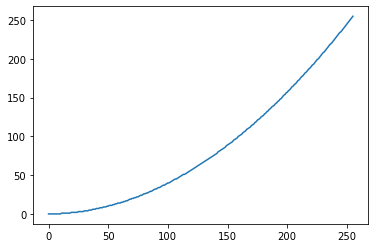

In [3]:
plt.plot(lut.kwadratowa)

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

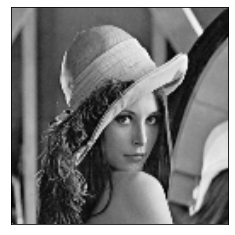

In [7]:
image1 = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(image1, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

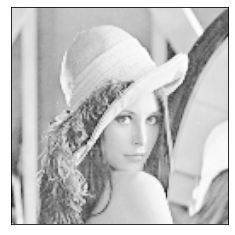

In [12]:
image2=cv2.LUT(image1, lut.log)
plt.imshow(image2, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [20]:
def LUT(img, tab):
    image3=cv2.LUT(img, tab)
    f, t = plt.subplots(1,3, figsize=(10,10))
    t[0].set_aspect('equal')
    t[0].set_title('Wykres przekodowania')
    t[0].plot(tab)  
    
    t[1].set_title('Obraz orygialny')
    t[1].imshow(img, 'gray')
    
    t[2].set_title('Obraz przekształcony')
    t[2].imshow(image3, 'gray')

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

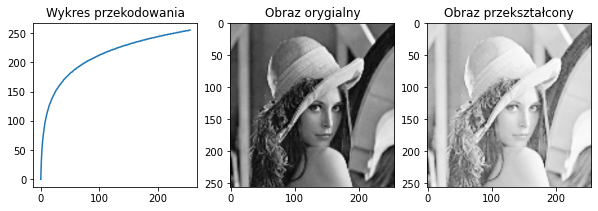

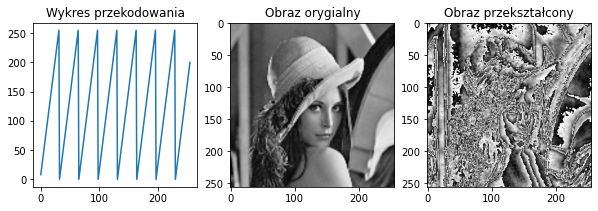

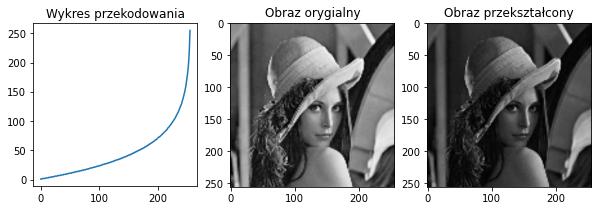

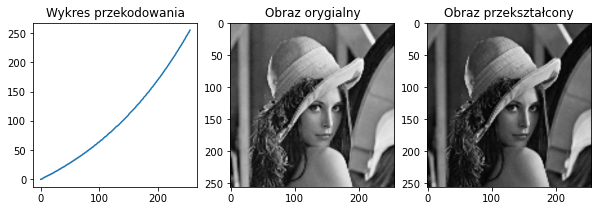

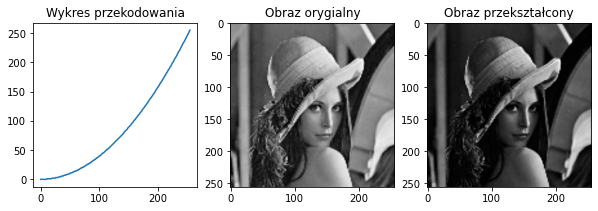

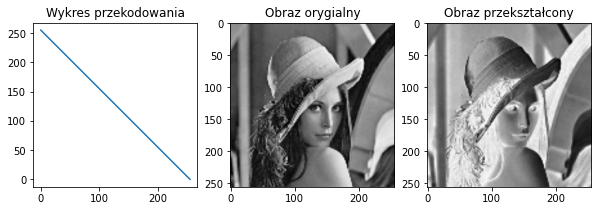

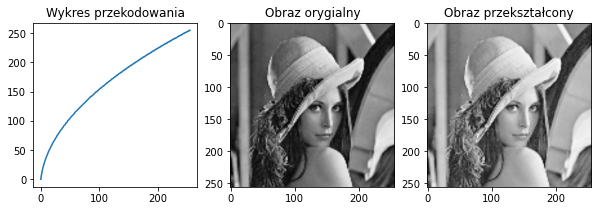

In [23]:
LUT(image1, lut.log)
LUT(image1, lut.pila)
LUT(image1, lut.odwlog)
LUT(image1, lut.wykladnicza)
LUT(image1, lut.kwadratowa)
LUT(image1, lut.odwrotna)
LUT(image1, lut.pierwiastkowa)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

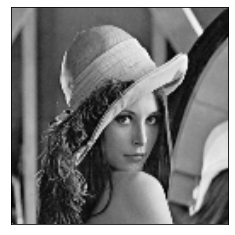

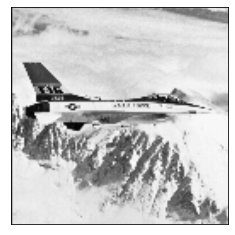

In [25]:
lena = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(lena, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

jet = cv2.imread('jet.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(jet, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

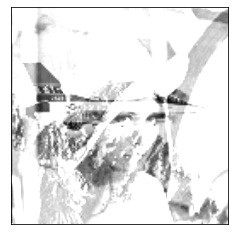

In [28]:
dod = cv2.add(lena, jet)
plt.imshow(dod/2, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

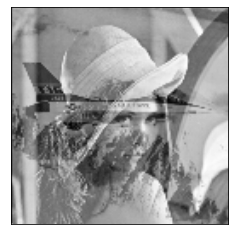

In [29]:
dod2 = cv2.add(lena.astype('uint16'), jet.astype('uint16'))
plt.imshow(dod2/2, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

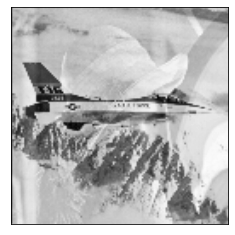

In [36]:
komb_lin = cv2.addWeighted(lena, 0.5, jet, 0.6, 0)
komb_lin2 = cv2.addWeighted(lena, 0.5, jet, 0.6, 10)
komb_lin3 = cv2.addWeighted(lena, 0.2, jet, 0.8, 0)
plt.imshow(komb_lin3, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

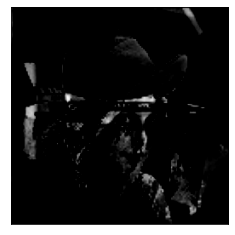

In [39]:
ode = cv2.subtract(lena, jet)
plt.imshow(ode, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

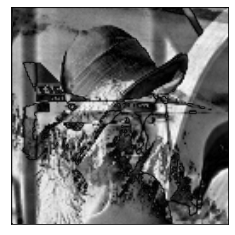

In [40]:
ode = cv2.subtract(lena.astype('int16'), jet.astype('int16'))
plt.imshow(abs(ode), 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

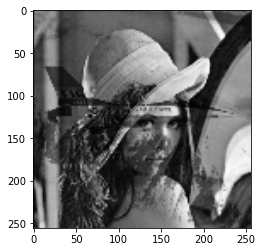

In [60]:
ode = cv2.multiply(lena.astype('float64'), jet.astype('float64'))
plt.imshow(ode, 'gray')
plt.show()

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

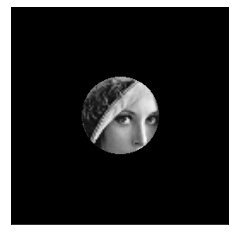

In [43]:
maska=plt.imread("kolo.bmp")
mno = cv2.multiply(lena, (maska).astype('bool').astype('uint8'))

plt.imshow(mno, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

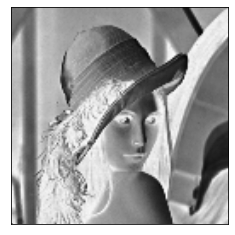

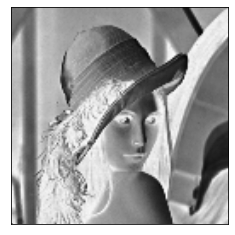

In [45]:
neg1 = cv2.bitwise_not(lena)
plt.imshow(neg1, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

neg2 = cv2.LUT(lena, lut.odwrotna)
plt.imshow(neg2, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

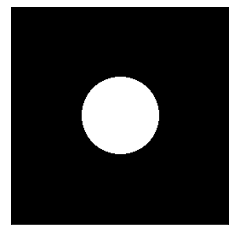

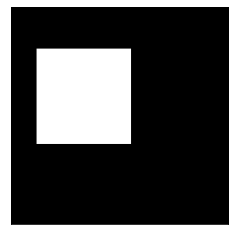

In [48]:
kolo=plt.imread("kolo.bmp")
plt.imshow(kolo, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

kwadrat=plt.imread("kwadrat.bmp")
plt.imshow(kwadrat, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()


Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

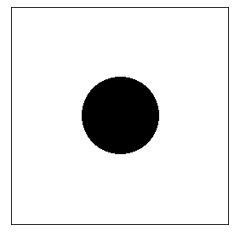

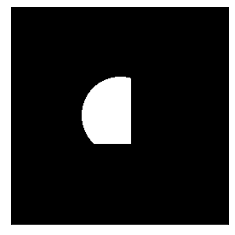

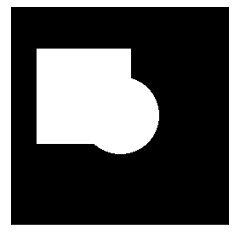

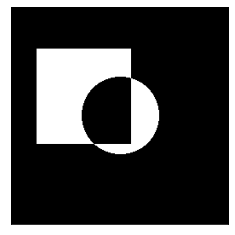

In [55]:
nott = ~(kolo)
plt.imshow(nott, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

andd = kolo & kwadrat
plt.imshow(andd, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

orr = kolo | kwadrat
plt.imshow(orr, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

xorr = kolo ^ kwadrat
plt.imshow(xorr, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()